Importamos las librerías. Usaremos el dataset Iris para el ejemplo en PCA.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Cargamos la data, y la escalamos usando el MinMaxScaler. Pueden usar otro tipo de preprocesamiento como el StandardScaler

Separamos las X de la Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = load_iris()
x = np.array(data.data)
x = MinMaxScaler().fit_transform(x)
y = data.target

A partir de la data X, calculamos la matríz de covarianza

In [ ]:
cov = np.cov(x.T)

Descomponemos la matriz de covarianza en los eigenvalue y eigenvector.

Con el eigenvalue determinaremos la "importancia" de cada componente

Con el eigenvector, determinaremos la dirección hacia donde apuntan los nuevos ejes (compomentes)

In [ ]:
eigvalue, eigvector = np.linalg.eig(cov)

In [ ]:
print(eigvalue)
print(eigvector)

Calculamos el total de varianza a partir de los eigenvalues y calculamos la proporcion porcentual que cada componente aporta a la varianza total de la data. Acumulamos los resultados.

In [ ]:
var_explicada = []
var_explicada_acum = []
var_acum = 0

for i in eigvalue:
  varianza = (i/sum(eigvalue))*100
  var_acum += varianza

  var_explicada.append(varianza)
  var_explicada_acum.append(var_acum)

print(var_explicada)
print(var_explicada_acum)

[(9.722170877984182+0j), (7.07809717743303+0j), (6.247474948801078+0j), (5.463692648654718+0j), (4.870538978767514+0j), (4.287818002917562+0j), (3.2650206634962458+0j), (2.890580995603047+0j), (2.7539188161346413+0j), (2.3569935572689498+0j), (2.1266112178409973+0j), (2.0063729087830295+0j), (1.7067939691518565+0j), (1.695792688374031+0j), (1.577181464797921+0j), (1.4637420919005206+0j), (1.3097395783787278+0j), (1.2778762549100922+0j), (1.1900098304328968+0j), (1.151907760998705+0j), (1.08433311607595+0j), (0.9977349589343022+0j), (0.950659174076115+0j), (0.9076770225236649+0j), (0.8769274602560662+0j), (0.8390874032907947+0j), (0.8164184408762617+0j), (0.7801504554636495+0j), (0.7433808715237948+0j), (0.6892079717256374+0j), (0.6543549177302294+0j), (0.6472447023496259+0j), (0.6059383163268057+0j), (0.5844428299201999+0j), (0.5640454387292206+0j), (0.5461870117635379+0j), (0.5047569594999285+0j), (0.490889584557442+0j), (0.47569897558567564+0j), (0.467965917832174+0j), (0.45415161357

El mismo ejercicio lo podemos realizar con la librería de sklearn. Variando el número de componentes, determinamos con cuántos nos quedamos luego de transformar la data. Alternativamente, se puede optar por la cantidad de varianza a conservar si es que le indicamos un valor entre 0 y 1

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x)

PCA(n_components=3)

In [ ]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]
[0.92461872]


Transformando la data original a los nuevos componentes

In [ ]:
x_pca = pca.transform(x)

Comparamos modelos de ML usando la data original y la data transformada por PCA

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo1 = LogisticRegression(max_iter=1000)
modelo2 = LogisticRegression(max_iter=1000)

modelo1.fit(x,y)

LogisticRegression(max_iter=1000)

In [ ]:
modelo2.fit(x_pca,y)

LogisticRegression(max_iter=1000)

In [ ]:
print(modelo1.score(x,y))
print(modelo2.score(x_pca,y))

0.94
0.9533333333333334


In [ ]:
import pandas as pd
data = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)
x = data.drop(columns=0)
x = x/255.0
y = data[0]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


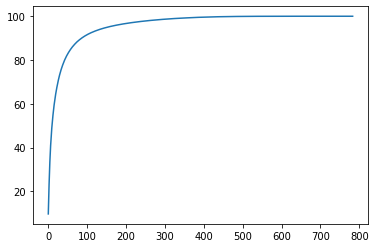

In [ ]:
plt.plot(range(len(var_explicada_acum)),var_explicada_acum)

In [ ]:
pca = PCA(n_components=0.99)
pca.fit(x)

PCA(n_components=0.99)

In [ ]:
pca.n_components_

330

In [ ]:
print(x[0])
print(x_pca[0])
x_reconstruido = pca.inverse_transform(x_pca[0])
print(x_reconstruido)

[0.22222222 0.625      0.06779661 0.04166667]
[-0.63070293  0.10757791 -0.0187191 ]
[0.21957616 0.62658428 0.07351392 0.03832119]
